## 파이썬 머신러닝 완벽 가이드

* 코드 및 내용 출처 : `파이썬 머신러닝 완벽 가이드, 저자 권철민`

In [49]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [51]:
directory = 'C:/Users/KIHyuk/Documents/GitHub/Jupyter_Repo/jupyter_CODE/파이썬 머신러닝 완벽가이드/data/'

In [52]:
train = pd.read_csv(directory + 'titanic_train.csv')

In [53]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
## 결측값 처리

train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Cabin'].fillna('N',inplace=True)
train['Embarked'].fillna('N',inplace=True)

print("총 결측치 개수 : ", train.isnull().sum().sum()) # isnull().sum().sum()

총 결측치 개수 :  0


In [56]:
# 문자열 피처

print("Sex 값 분포 :\n",train['Sex'].value_counts())
print("Cabin 값 분포 :\n",train['Cabin'].value_counts())
print("Embarked 값 분포 :\n",train['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포 :
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
A24              1
D28              1
B102             1
E38              1
D6               1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* Cabin(선실)의 경우 C23 C25 C27 .. 등 정리가 필요하다. 등급을 나누는 기준인 맨 앞의 알파벳을 기준으로 분할한다.

In [57]:
train['Cabin'] = train['Cabin'].str[:1]

* 성별이 생존확률에 어떤 영향을 미쳤을까? `성별에 따른 생존자 수 비교`

In [58]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


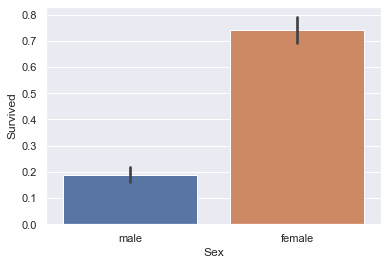

In [17]:
sns.barplot(x='Sex',y='Survived',data=train)

* 선실등급을 활용하여 부자와 가난한 사람 간의 생존 확률도 살펴보자

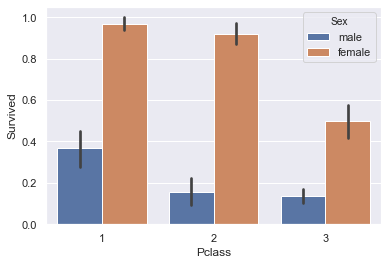

In [18]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train)

* 나이에 따른 생존확률

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


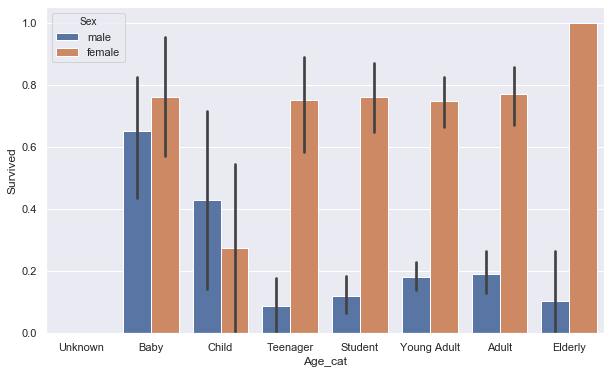

In [59]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

train['Age_cat'] = train['Age'].apply(get_category)

sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=train,order=group_names)
train.drop('Age_cat', axis=1, inplace=True)

* 문자열 피처를 숫자형 피처로 변환

In [60]:
from sklearn import preprocessing

def encode_features(df):
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        
    return df

train = encode_features(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [61]:
## 전처리 과정 함수화

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [62]:
# 원본 데이터를 재로딩하고, 피처 데이터와 레이블 데이터 추출

train = pd.read_csv(directory + 'titanic_train.csv')

y_train = train['Survived']
x_train = train.drop('Survived',axis=1)

x_train = transform_features(x_train)

In [63]:
# train / test split => 학습데이터에서 검증데이터 추출

from sklearn.model_selection import train_test_split

x_train_df = x_train
y_train_df = y_train

X_train,X_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.2, random_state=11)

* 분류알고리즘을 사용해보자

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [47]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 결정트리
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리 정확도 : ', accuracy_score(y_test,dt_pred))

# 랜덤포레스트
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트 정확도 : ', accuracy_score(y_test,rf_pred))

# 로지스틱회귀
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀 정확도 : ', accuracy_score(y_test,lr_pred))

결정트리 정확도 :  0.7877094972067039
랜덤포레스트 정확도 :  0.8324022346368715
로지스틱회귀 정확도 :  0.8659217877094972


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* 교차검증

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_train_df, y_train_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))

print("평균정확도 : ", np.mean(scores))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7765
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8418
평균정확도 :  0.7835081515022234


* 그리드 서치를 통한 최적 파리미터 서칭

In [67]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print('그리드 서치 최적 파라미터 : ' , grid_dclf.best_params_)
print('그리드 서치 최고 정확도 : ', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimators로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 결정트리 정확도 : ',accuracy)

그리드 서치 최적 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
그리드 서치 최고 정확도 :  0.7991573033707865
테스트 세트에서의 결정트리 정확도 :  0.8715083798882681


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
